# About Dataset
### Population is increasing regularly. We need to identify the growth of population of each city of each country. If the population is not controlled then it can create a huge problem. It will directly effect the resources of nature elements. This dataset contain population growth of each city of each country.
###  Here we have columns:
### 1. Population in 2022
### 2. Population in 2023
### 3. City
### 4. Country
### 5. Population growth rate
### 6. Type

### _________________________________________________________________________________

# Effects of population on Natural Resources

# Life cycle of Machine learning Project
### •	Understanding the Problem Statement
### •	Data Collection
### •	Data Checks to perform
### •	Exploratory data analysis
### •	Data Pre-Processing
### •	Model Training
### •	Choose best model


## 1) Problem Statement

### •	This project understands how the Population (Natural Resources) is affected by other variables such as Poplation in 2022, Population in 2023, City, Country, Population Growth Rate and Type 3.

### Importing Libraries

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 2) Reading of data

In [76]:
def read_data():
    data = pd.read_csv("C:/Kaggle_dataset/World_country_population/world-country-populations.csv")
    return data

### Calling of data

In [77]:
df = read_data()
print(df)

     population_in_2023  population_in_2022             city     country  \
0              37194105            37274002            Tokyo       Japan   
1              32941309            32065760            Delhi       India   
2              29210808            28516903         Shanghai       China   
3              23209616            22478117            Dhaka  Bangladesh   
4              22619736            22429799        Sao Paulo      Brazil   
..                  ...                 ...              ...         ...   
773              752916              734805         Tongling       China   
774              752744              729109         Tirupati       India   
775              751679              733917           Wuzhou       China   
776              750102              723114             Yuxi       China   
777              750097              733643  Suining Sichuan       China   

     population_growthRate type  
0                  -0.0021    w  
1                  

## 3) Preprocessing and Feature Engineering

In [78]:
df1 = df.copy()

### i) Check Missing Values

In [79]:
df1.isna().sum()

population_in_2023       0
population_in_2022       0
city                     0
country                  0
population_growthRate    0
type                     0
dtype: int64

### ii) Check Duplicates

In [80]:
df1.duplicated().sum()

0

### iii) Check datatype

In [81]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   population_in_2023     778 non-null    int64  
 1   population_in_2022     778 non-null    int64  
 2   city                   778 non-null    object 
 3   country                778 non-null    object 
 4   population_growthRate  778 non-null    float64
 5   type                   778 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 36.6+ KB


### iv) Check the number of unique values of each column

In [82]:
print(df1.nunique())

population_in_2023       778
population_in_2022       778
city                     774
country                  141
population_growthRate    396
type                       2
dtype: int64


### v) Check Statistics of dataset

In [83]:
print(df1.describe())

       population_in_2023  population_in_2022  population_growthRate
count        7.780000e+02        7.780000e+02             778.000000
mean         2.658927e+06        2.607826e+06               0.020758
std          3.700349e+06        3.638665e+06               0.013135
min          7.500970e+05        7.231140e+05              -0.034800
25%          9.921812e+05        9.657890e+05               0.012625
50%          1.381252e+06        1.362342e+06               0.019950
75%          2.607130e+06        2.548158e+06               0.028675
max          3.719410e+07        3.727400e+07               0.061100


### vi) Check various caegories present in the different categorical column

In [84]:
print(df1.describe(include='object'))

            city country type
count        778     778  778
unique       774     141    2
top     San Jose   China    w
freq           2     219  762


## 4.Exploring data (Visualization)

### 4.1 Visualze population growthRate distribution to make some conclusions. 

### . Histogram
### . Kernal Distibution Function

### 4.1.1 Histogram and KDE

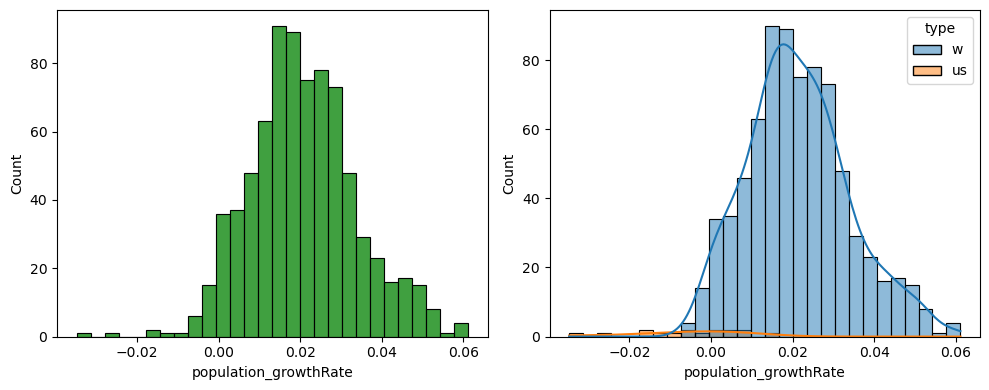

In [85]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(data = df1,x = 'population_growthRate',color='g')

plt.subplot(1,2,2)
sns.histplot(data =df1,x = 'population_growthRate',kde=True,hue='type')

plt.tight_layout()
plt.show()

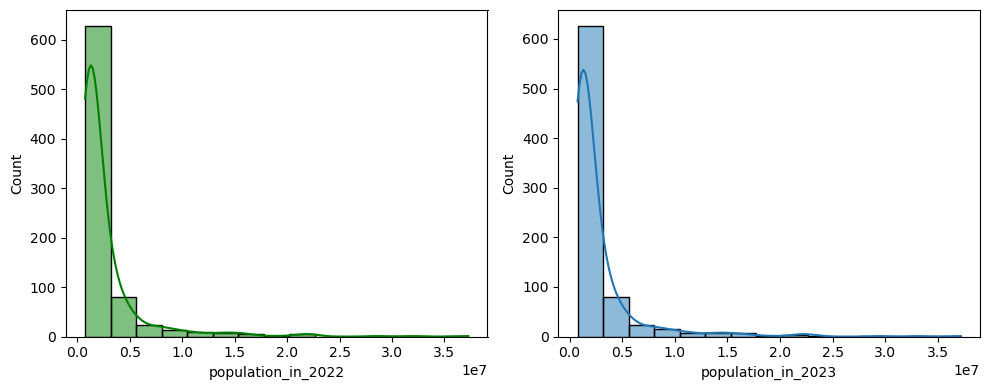

In [86]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(data = df1,x = 'population_in_2022',color='g',bins=15,kde=True)

plt.subplot(1,2,2)
sns.histplot(data =df1,x = 'population_in_2023',kde=True,bins=15)

plt.tight_layout()
plt.show()

In [87]:
df1.columns

Index(['population_in_2023', 'population_in_2022', 'city', 'country',
       'population_growthRate', 'type'],
      dtype='object')

## 1) Univariate Analysis

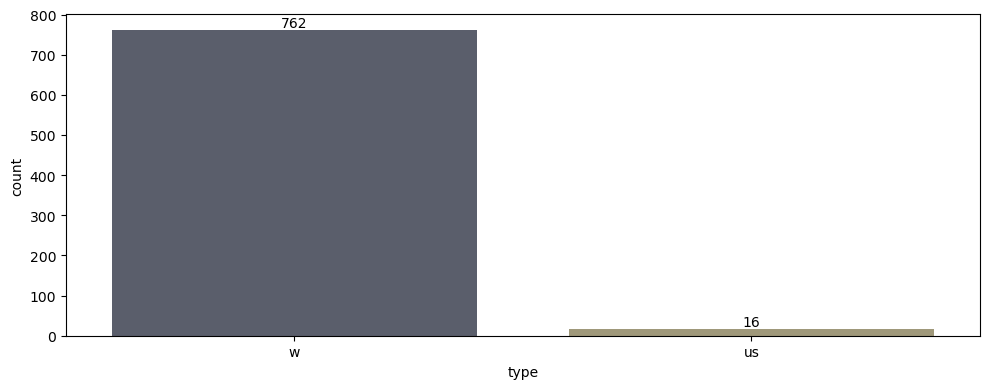

In [88]:
plt.figure(figsize=(10,4))
ax = sns.countplot(data=df1,x='type',palette='cividis')
for bars in ax.containers:
    ax.bar_label(bars)
plt.tight_layout()
plt.show()

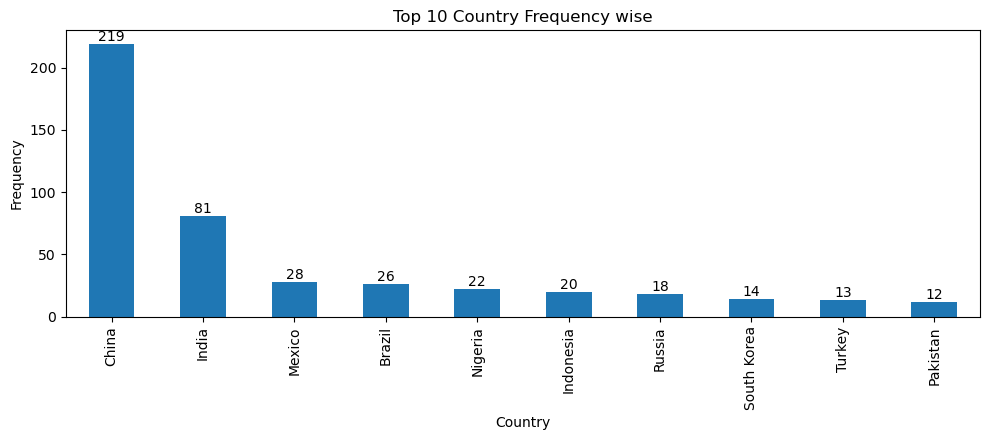

In [89]:
plt.figure(figsize=(10,4.5))
ax = df1['country'].value_counts().head(10).plot(kind='bar')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.title('Top 10 Country Frequency wise')
plt.tight_layout()
plt.show()

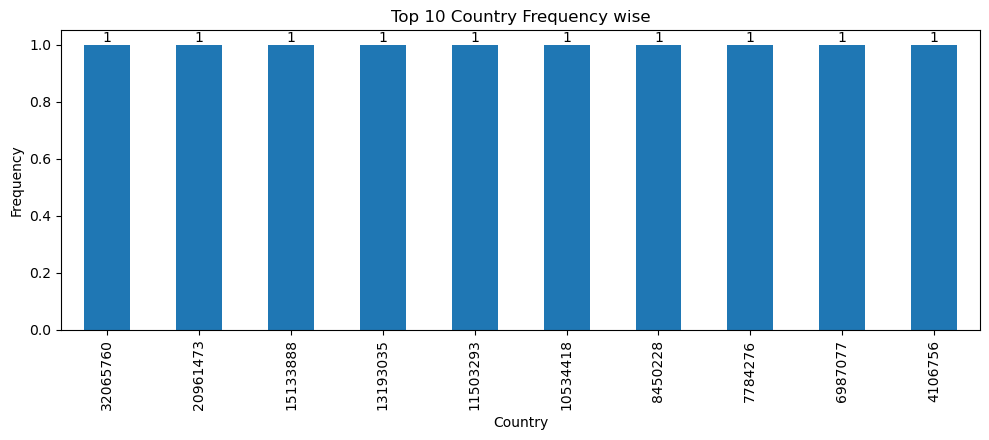

In [91]:
plt.figure(figsize=(10,4.5))
ax = a['population_in_2022'].value_counts().sort_index(ascending=False).head(10).plot(kind='bar')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.title('Top 10 Country Frequency wise')
plt.tight_layout()
plt.show()

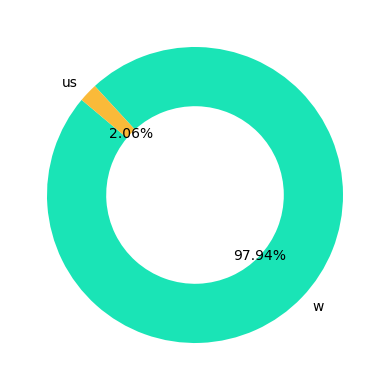

In [92]:
plt.figure(figsize=(8,4))
type_value_counts = df1['type'].value_counts().head()
colors = sns.color_palette('turbo',len(type_value_counts))
plt.pie(type_value_counts,labels=type_value_counts.index,
       autopct='%1.2f%%',startangle=140,colors=colors,wedgeprops=dict(width=0.4))
plt.tight_layout()
plt.show()

## 2) Bivariate Analysis

In [104]:
a = df1[df1['country'] == 'India']
a

,population_in_2023,population_in_2022,city,country,population_growthRate,type,year_diff
1,32941309,32065760,Delhi,India,0.0273,w,875549
8,21296517,20961473,Mumbai,India,0.0160,w,335044
16,15332793,15133888,Kolkata,India,0.0131,w,198905
22,13607800,13193035,Bangalore,India,0.0314,w,414765
25,11776147,11503293,Chennai,India,0.0237,w,272854
...,...,...,...,...,...,...,...
743,786192,757238,Kayamkulam,India,0.0382,w,28954
751,775559,762998,Cuttack,India,0.0165,w,12561
759,767161,752185,Belgaum,India,0.0199,w,14976
763,764628,747821,Malegaon,India,0.0225,w,16807


Text(0.5, 1.0, 'Top 10 Country population in year 2022')

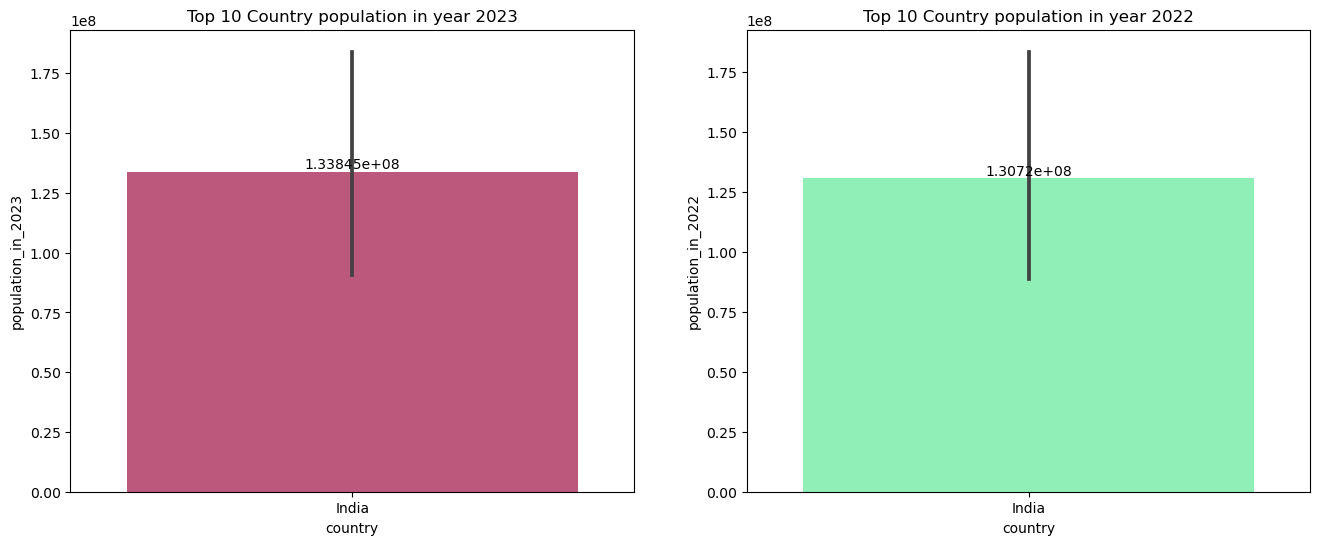

In [141]:
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
top_10 = a.sort_values(by='population_in_2023', ascending=False).head(10)
# Create Seaborn barplot
ax = sns.barplot(x='country', y='population_in_2023', data=top_10, palette='plasma',estimator=sum)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Top 10 Country population in year 2023')
    
plt.subplot(1,2,2)
top_10 = a.sort_values(by='population_in_2022', ascending=False).head(10)
# Create Seaborn barplot
ax = sns.barplot(x='country', y='population_in_2022', data=top_10, palette='rainbow',estimator=sum)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Top 10 Country population in year 2022')

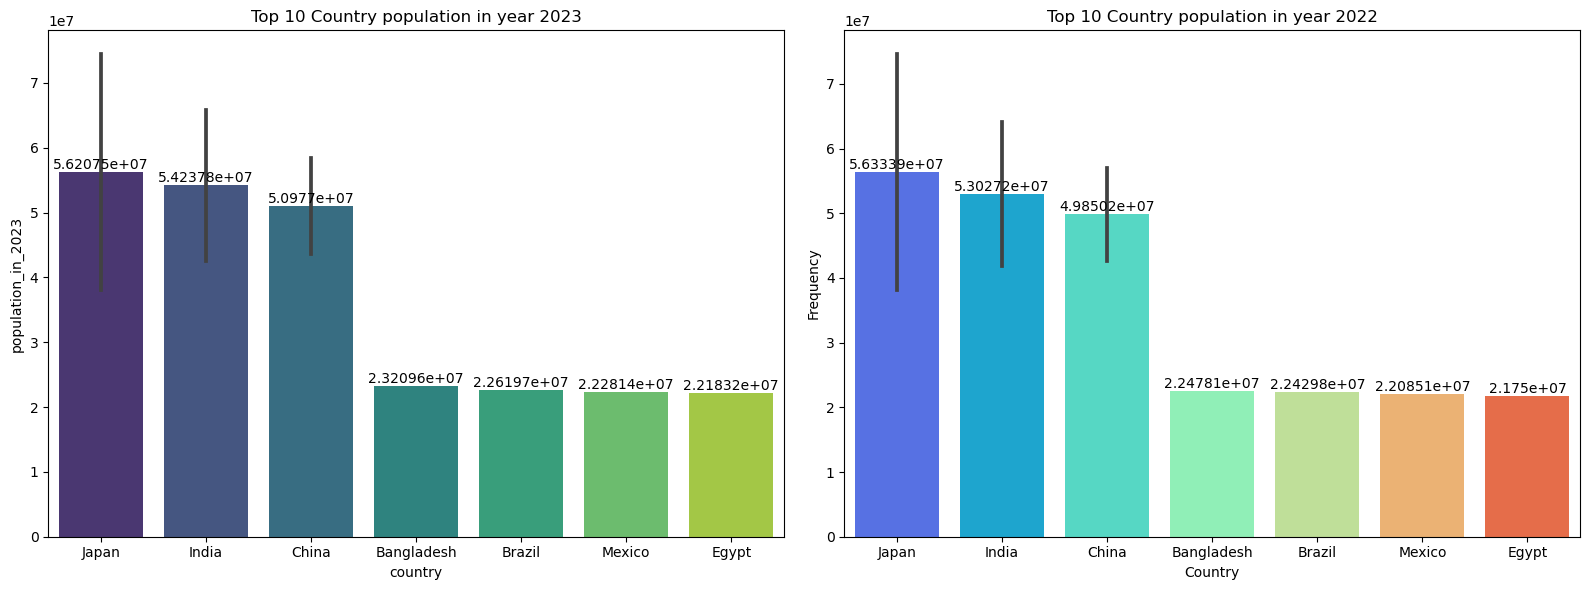

In [136]:
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
top_10 = df1.sort_values(by='population_in_2023', ascending=False).head(10)
# Create Seaborn barplot
ax = sns.barplot(x='country', y='population_in_2023', data=top_10, palette='viridis',estimator=sum)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Top 10 Country population in year 2023')
    
plt.subplot(1,2,2)
top_10 = df1.sort_values(by='population_in_2022', ascending=False).head(10)
# Create Seaborn barplot
ax = sns.barplot(x='country', y='population_in_2022', data=top_10, palette='rainbow',estimator=sum)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Top 10 Country population in year 2022')
    
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

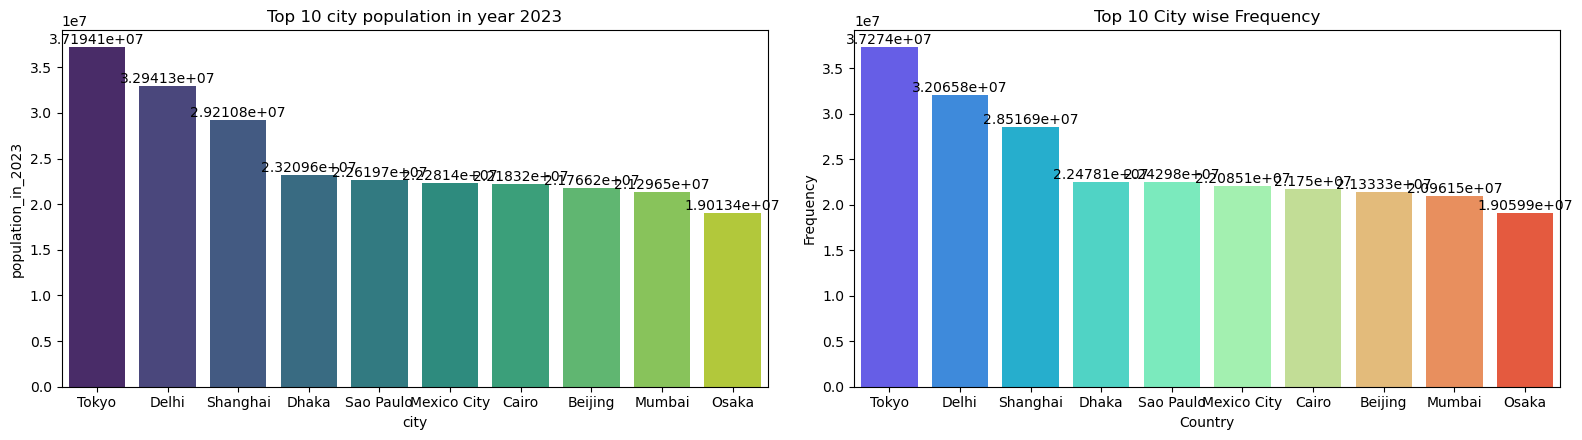

In [145]:

plt.figure(figsize=(16,4.5))

plt.subplot(1,2,1)
top_10 = df1.sort_values(by='population_in_2023', ascending=False).head(10)
# Create Seaborn barplot
ax = sns.barplot(x='city', y='population_in_2023', data=top_10, palette='viridis',estimator=sum)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Top 10 city population in year 2023')
    
plt.subplot(1,2,2)
top_10 = df1.sort_values(by='population_in_2022', ascending=False).head(10)
# Create Seaborn barplot
ax = sns.barplot(x='city', y='population_in_2022', data=top_10, palette='rainbow',estimator=sum)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Top 10 city population in year 2022')

plt.xlabel('Country')
plt.ylabel('Frequency')
plt.title('Top 10 City wise Frequency')
plt.tight_layout()
plt.show()

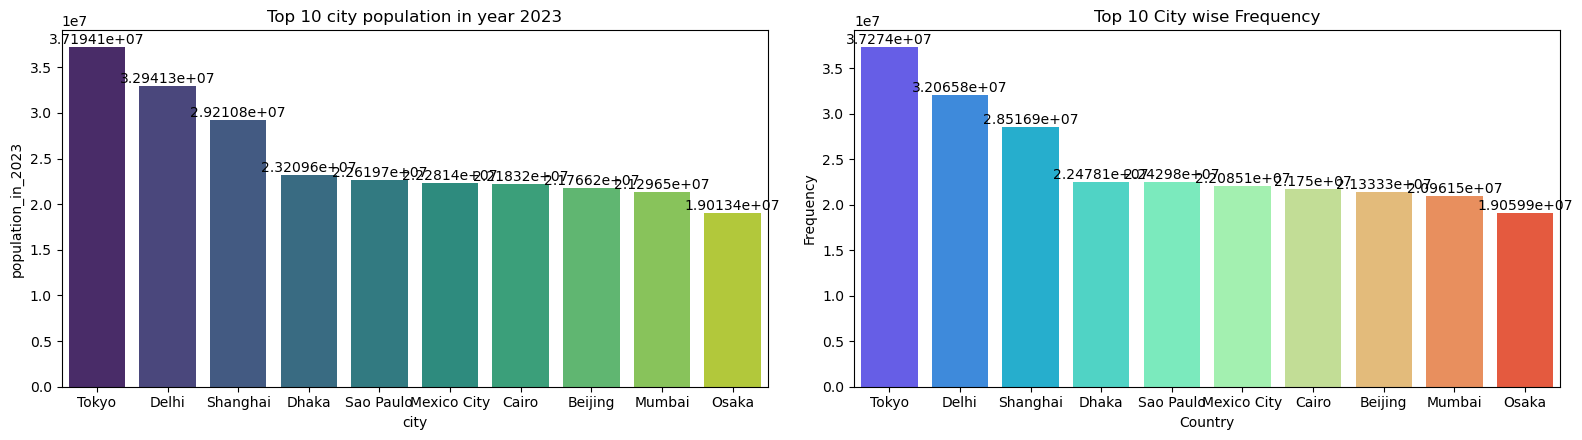

In [138]:
plt.figure(figsize=(16,4.5))

plt.subplot(1,2,1)
top_10 = df1.sort_values(by='population_in_2023', ascending=False).head(10)
# Create Seaborn barplot
ax = sns.barplot(x='city', y='population_in_2023', data=top_10, palette='viridis',estimator='mean')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Top 10 city population in year 2023')
    
plt.subplot(1,2,2)
top_10 = df1.sort_values(by='population_in_2022', ascending=False).head(10)
# Create Seaborn barplot
ax = sns.barplot(x='city', y='population_in_2022', data=top_10, palette='rainbow',estimator='mean')
for bars in ax.containers:
    ax.bar_label(bars)
    
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.title('Top 10 City wise Frequency')
plt.tight_layout()
plt.show()

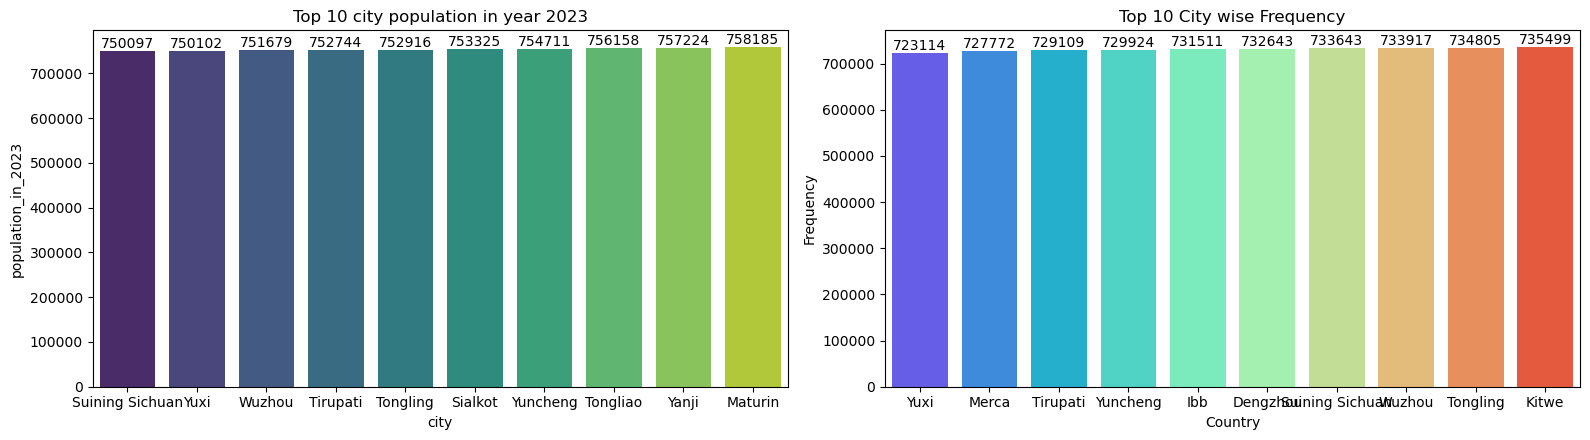

In [139]:
plt.figure(figsize=(16,4.5))

plt.subplot(1,2,1)
top_10 = df1.sort_values(by='population_in_2023', ascending=True).head(10)
# Create Seaborn barplot
ax = sns.barplot(x='city', y='population_in_2023', data=top_10, palette='viridis',estimator=min)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Top 10 city population in year 2023')
    
plt.subplot(1,2,2)
top_10 = df1.sort_values(by='population_in_2022', ascending=True).head(10)
# Create Seaborn barplot
ax = sns.barplot(x='city', y='population_in_2022', data=top_10, palette='rainbow',estimator=min)
for bars in ax.containers:
    ax.bar_label(bars)
    
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.title('Top 10 City wise Frequency')
plt.tight_layout()
plt.show()

In [122]:
df1['population_in_2023'].sort_index(ascending=False).head(10)

777    750097
776    750102
775    751679
774    752744
773    752916
772    753325
771    754711
770    756158
769    757224
768    758185
Name: population_in_2023, dtype: int64

In [110]:
df1['year_diff'] = df1['population_in_2023'] - df1['population_in_2022']
df1['year_diff'] 

0      -79897
1      875549
2      693905
3      731499
4      189937
        ...  
773     18111
774     23635
775     17762
776     26988
777     16454
Name: year_diff, Length: 778, dtype: int64

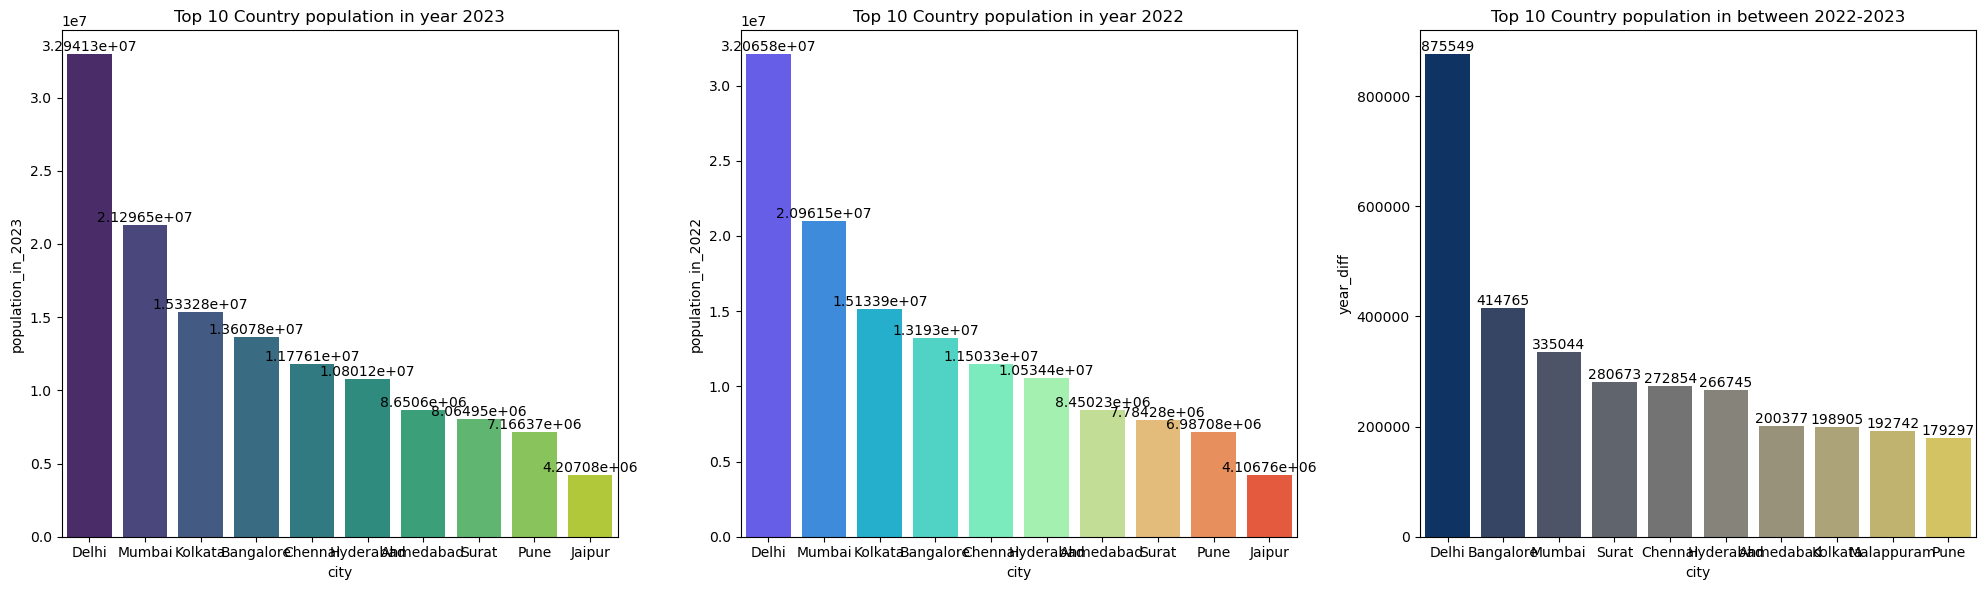

In [140]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
top_10 = a.sort_values(by='population_in_2023', ascending=False).head(10)
# Create Seaborn barplot
ax = sns.barplot(x='city', y='population_in_2023', data=top_10, palette='viridis',estimator=sum)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Top 10 Country population in year 2023')
    
plt.subplot(1,3,2)
top_10 = a.sort_values(by='population_in_2022', ascending=False).head(10)
# Create Seaborn barplot
ax = sns.barplot(x='city', y='population_in_2022', data=top_10, palette='rainbow',estimator=sum)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Top 10 Country population in year 2022')

plt.subplot(1,3,3)
top_10 = a.sort_values(by='year_diff', ascending=False).head(10)
# Create Seaborn barplot
ax = sns.barplot(x='city', y='year_diff', data=top_10, palette='cividis',estimator=sum)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Top 10 Country population in between 2022-2023')

plt.tight_layout()
plt.show()

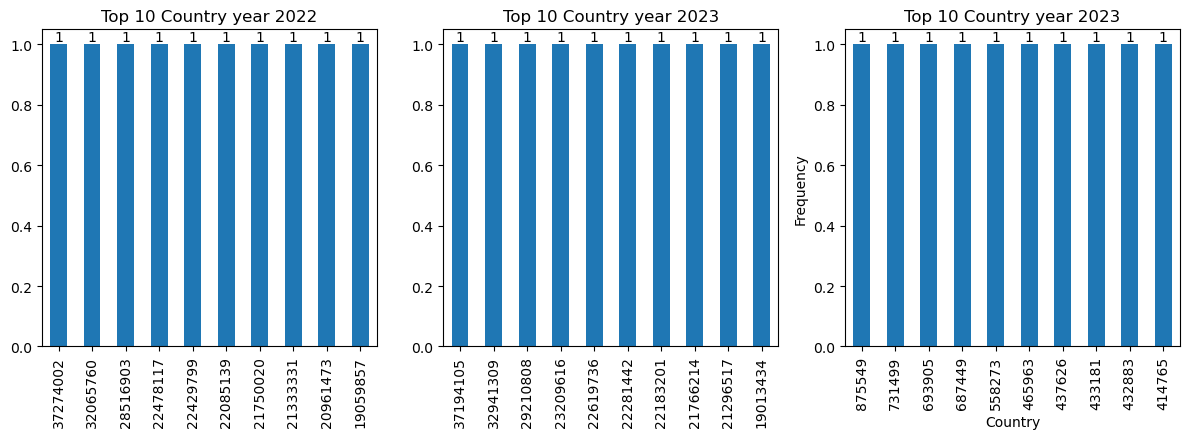

In [112]:
plt.figure(figsize=(12,4.5))
plt.subplot(1,3,1)
plt.title('Top 10 Country year 2022')
ax = df1['population_in_2022'].value_counts().sort_index(ascending=False).head(10).plot(kind='bar')
for bars in ax.containers:
    ax.bar_label(bars)
    
plt.subplot(1,3,2)
plt.title('Top 10 Country year 2023')
ax = df1['population_in_2023'].value_counts().sort_index(ascending=False).head(10).plot(kind='bar')
for bars in ax.containers:
    ax.bar_label(bars)
    
plt.subplot(1,3,3)
plt.title('Top 10 Country year 2023')
ax = df1['year_diff'].value_counts().sort_index(ascending=False).head(10).plot(kind='bar')
for bars in ax.containers:
    ax.bar_label(bars)

plt.xlabel('Country')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10,4))
ax = sns.lineplot(data=df1,x='population_in_2022',y = 'population_in_2023',estimator='sum',palette='turbo',hue='type')
for bars in ax.containers:
    ax.bar_label(bars)
plt.tight_layout()
plt.show()

In [ ]:
df1['population_in_2022'].unique()

In [ ]:
plt.figure(figsize=(10,4.5))
df.groupby('country')['population_in_2022'].sum().plot(kind='bar')

In [ ]:
df1['population_in_2022'].sum()

In [ ]:
df1['population_in_2023'].sum()

In [ ]:
2068645432-2028888987

In [ ]:
data = {'Year': ['Population in 2022','Population in 2023','Diff'],
        'Total Population': [2028888987,2068645432,39756445]}

In [ ]:
fd = pd.DataFrame(data)
fd

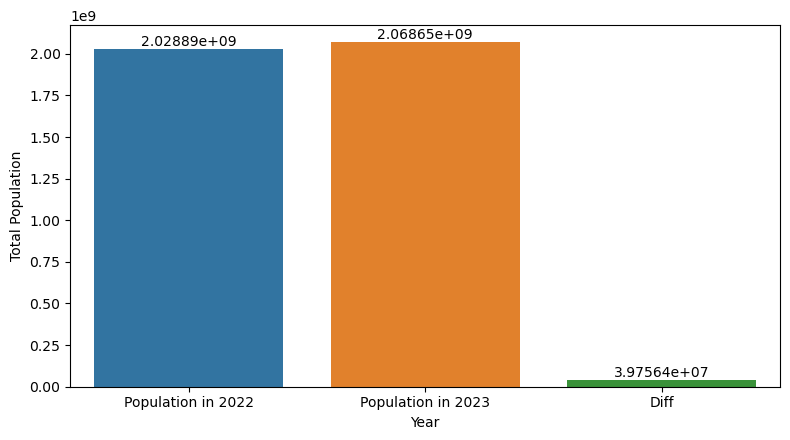

In [128]:
plt.figure(figsize=(8,4.5))
ax = sns.barplot(data=fd,x='Year',y='Total Population')
for bars in ax.containers:
    ax.bar_label(bars)
    
plt.tight_layout()
plt.show()

In [146]:
a[a['city'] == 'Mumbai']

,population_in_2023,population_in_2022,city,country,population_growthRate,type,year_diff
8,21296517,20961473,Mumbai,India,0.016,w,335044


In [ ]:
df1